In [1]:
from uncertainties import ufloat
from uncertainties import unumpy as unp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def eq1(r,l):
    return r**4/l

def eq2(d,l):
    return d**4/l

def d(r):
    return 2*r

def r(d):
    return d/2

def I(V,t):
    return V/t

def mean(a):
    return sum(a)/len(a)

d1=0.00080
l1=0.1196
d4=0.00095
l4=0.1185
d3=0.00082
l3=0.0817
d5=0.00089
l5=0.080
d2=0.00082
l2=0.1223

print('d 1',eq2(d1,l1))
print('d 2',eq2(d2,l2))
print('d 3',eq2(d3,l3))
print('d 4',eq2(d4,l4))
print('d 5',eq2(d5,l5))

d 1 3.4247491638795994e-12
d 2 3.69682551103843e-12
d 3 5.5339260709914325e-12
d 4 6.873470464135021e-12
d 5 7.842780124999997e-12


In [17]:
uv=0.0000005
ut=0.3

I1=mean(np.array([I(ufloat(0.0000055,uv),ufloat(38.56,ut)),I(ufloat(0.0000060,uv),ufloat(40.14,ut)),I(ufloat(0.0000075,uv),ufloat(50.74,ut)),I(ufloat(0.0000080,uv),ufloat(59.79,ut)),I(ufloat(0.0000050,uv),ufloat(31.52,ut))]))
I4=mean(np.array([I(ufloat(0.0000085,uv),ufloat(30.50,ut)),I(ufloat(0.0000063,uv),ufloat(20.94,ut)),I(ufloat(0.0000140,uv),ufloat(50.16,ut)),I(ufloat(0.0000125,uv),ufloat(44.89,ut)),I(ufloat(0.0000055,uv),ufloat(18.07,ut))]))
I3=mean(np.array([I(ufloat(0.0000097,uv),ufloat(48.52,ut)),I(ufloat(0.0000070,uv),ufloat(34.81,ut)),I(ufloat(0.0000080,uv),ufloat(38.80,ut)),I(ufloat(0.0000055,uv),ufloat(25.58,ut)),I(ufloat(0.0000115,uv),ufloat(57.77,ut))]))
I5=mean(np.array([I(ufloat(0.0000130,uv),ufloat(47.28,ut)),I(ufloat(0.0000090,uv),ufloat(32.83,ut)),I(ufloat(0.0000060,uv),ufloat(20.32,ut)),I(ufloat(0.0000117,uv),ufloat(42.32,ut)),I(ufloat(0.0000150,uv),ufloat(54.86,ut))]))
I2=mean(np.array([I(ufloat(0.0000050,uv),ufloat(31.09,ut)),I(ufloat(0.0000077,uv),ufloat(56.25,ut)),I(ufloat(0.0000075,uv),ufloat(50.15,ut)),I(ufloat(0.0000070,uv),ufloat(45.27,ut)),I(ufloat(0.0000060,uv),ufloat(38.184,ut))]))

print(np.array([I(ufloat(0.0000085,uv),ufloat(30.50,ut)),I(ufloat(0.0000063,uv),ufloat(20.94,ut)),I(ufloat(0.0000140,uv),ufloat(50.16,ut)),I(ufloat(0.0000125,uv),ufloat(44.89,ut)),I(ufloat(0.0000055,uv),ufloat(18.07,ut))]))

#Iarrayn=[I1.n,I2.n,I3.n,I4.n,I5.n]
#Iarrays=[I1.s,I2.s,I3.s,I4.s,I5.s]

Iarrayn=[I1.n,I2.n,I3.n,I5.n]#I5.n,I4.n]
Iarrays=[I1.s,I2.s,I3.s,I5.s]#I5.s,I4.s]
Iarray=[I1,I2,I3,I5]

meanI=mean(Iarray)

#darray=[eq2(d1,l1),eq2(d2,l2),eq2(d3,l3),eq2(d4,l4),eq2(d5,l5)]
darray=[eq2(d1,l1),eq2(d2,l2),eq2(d3,l3),eq2(d5,l5)]#eq2(d5,l5),eq2(d4,l4)]
#darrayn=[eq2(d1,l1).n,eq2(d2,l2).n,eq2(d3,l3).n,eq2(d4,l4).n,eq2(d5,l5).n]
#darrays=[eq2(d1,l1).s,eq2(d2,l2).s,eq2(d3,l3).s,eq2(d4,l4).s,eq2(d5,l5).s]
print(Iarrays)
#Polynom
def fitfunc(x,a,b):
    return a*x+b

#Fitten
xfit=np.linspace(3e-12,8e-12,100)
popt,pcov=curve_fit(fitfunc,darray,Iarrayn)
a,b=popt
c,d=pcov
fit=a*xfit+b

#Ausgabe
plt.plot(xfit,fit,'-',color='orange',label='Lineare Regression')
print(np.sqrt(np.diag(pcov)))
c=np.sqrt(np.diag(pcov))[0]
d=np.sqrt(np.diag(pcov))[1]
dfit1=(a+c)*(xfit)+(b-d)
dfit2=(a-c)*(xfit)+(b+d)
plt.plot(xfit,dfit1,'--',color='orange')
plt.plot(xfit,dfit2,'--',color='orange')

plt.plot(darray,Iarrayn,'x',label='Messwerte',color='blue')
plt.errorbar(x=darray,y=Iarrayn,yerr=Iarrays,fmt='none',label='Fehlerbalken',color='red')

plt.grid()
fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=7.5
plt.xlabel(r'$\frac{d^4}{l}\ [\mathrm{m}^3]$',size='15')
plt.ylabel(r'$I_V\ \left[\mathrm{\frac{m^3}{s}}\right]$',size='15')
plt.rcParams["figure.figsize"]=fig_size
plt.legend()
#plt.savefig(filename='graph_without_5.png',dpi=300)
plt.show()

[2.786885245901639e-07+/-1.6621044817052634e-08
 3.0085959885386817e-07+/-2.4263666637051406e-08
 2.7910685805422647e-07+/-1.0106909488038647e-08
 2.784584539986634e-07+/-1.1292726404241729e-08
 3.0437188710570006e-07+/-2.812780402998205e-08]
[5.469713169985449e-09, 5.428910329918648e-09, 6.164574559465859e-09, 2.788522166952547e-07+/-6.9464065484180456e-09]
[  8.96377021e+02   4.85884642e-09]


TypeError: can't convert an affine function (<class 'uncertainties.core.AffineScalarFunc'>) to float; use x.nominal_value

[  4.96928415e+03   2.85267694e-08]


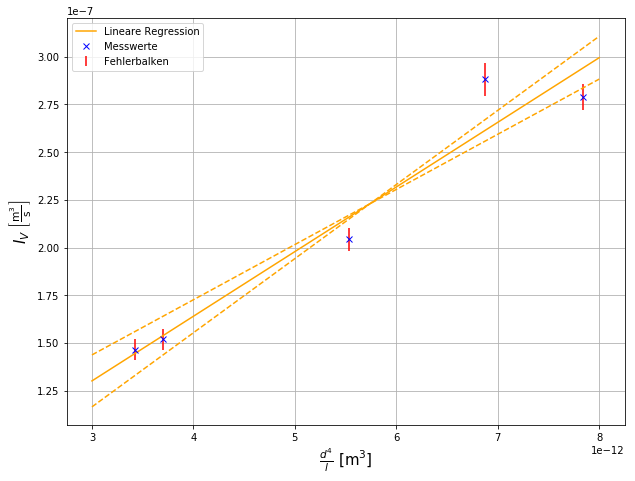

In [14]:
Iarrayn=[I1.n,I2.n,I3.n,I4.n,I5.n]
Iarrays=[I1.s,I2.s,I3.s,I4.s,I5.s]
Iarray=[I1,I2,I3,I4,I5]

meanI=mean(Iarray)

darray=[eq2(d1,l1),eq2(d2,l2),eq2(d3,l3),eq2(d4,l4),eq2(d5,l5)]

#Fitten
popt,pcov=curve_fit(fitfunc,darray,Iarrayn)
a,b=popt
c,d=pcov
fit=a*xfit+b

#Ausgabe
plt.plot(xfit,fit,'-',color='orange',label='Lineare Regression')
print(np.sqrt(np.diag(pcov)))
c=np.sqrt(np.diag(pcov))[0]
d=np.sqrt(np.diag(pcov))[1]
dfit1=(a+c)*(xfit)+(b-d)
dfit2=(a-c)*(xfit)+(b+d)
plt.plot(xfit,dfit1,'--',color='orange')
plt.plot(xfit,dfit2,'--',color='orange')

plt.plot(darray,Iarrayn,'x',label='Messwerte',color='blue')
plt.errorbar(x=darray,y=Iarrayn,yerr=Iarrays,fmt='none',label='Fehlerbalken',color='red')

plt.grid()
fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=7.5
plt.xlabel(r'$\frac{d^4}{l}\ [\mathrm{m}^3]$',size='15')
plt.ylabel(r'$I_V\ \left[\mathrm{\frac{m^3}{s}}\right]$',size='15')
plt.rcParams["figure.figsize"]=fig_size
plt.legend()
plt.savefig(filename='graph_with_5.png',dpi=300)
plt.show()

In der Formel $I_V=\frac{V}{t}$ haben sowohl $V$ und $t$ Fehler. Wir verwenden hier also die verallgemeinerte Formel f\"ur Quotienten:
$$
\left\vert\frac{\Delta z}{z}\right\vert=\sqrt{\left(a\frac{\Delta x}{x}\right)^2+\left(b\frac{\Delta y}{y}\right)^2+\ldots}\textrm{ f\"ur }z=x^a\ y^b\ldots
$$
Hier also:
$$
\left\vert\frac{\Delta I_V}{I_V}\right\vert=\sqrt{\left(\frac{\Delta V}{V}\right)^2+\left(-1\frac{\Delta t}{t}\right)^2}
$$
Da $\frac{d^4}{l}$ aus Werten ohne vorhandenem Fehler bestehen, berechnen wir daf\"ur keinen Fehler.

Um unseren Mittelwert zu berechnen, rechnen wir ganz leicht mit 
$$
\frac{\sum_{i=1}^n I{_V_i}}{n}\label{mean}
$$
den Nominalwert, und mit
$$
s_x=\sqrt{\frac{1}{n-1}\sum_{i=1}^n(x_i-\overline{x})^2}\label{meanstd}
$$
die Standardunsichertheit dessen.

Unsere Mittelwerte der $I_V$ f\"ur jede Position werden dann gegen $\nicefrac{d^4}{l}$ aufgetragen, siehe Abbildung (\ref{Abb1}).

Da wir jedoch klar erkennen k\"onnen, dass $I{_V_4}$ mit der linearen Steigung der anderen Werte nicht \"ubereinstimmt, lassen wir diesen Wert weg und erhalten die Gerade, welche in Abbildung (\ref{Abb2}) gefunden werden kann.


Um die Steigung der Ausgleichsgeraden zu berechnen, nehmen wir folgende Formel zunutze:
$$
a=\frac{\sum x_i^2\sum y_i-\sum x_i\sum x_iy_i}{n\sum x_i^2-(\sum x_i)^2}
$$


In [4]:
def a(x,y):
    n=len(x)
    return (sum(x**2)*sum(y)-sum(x)*sum(x*y))/(n*sum(x**2)-(sum(x))**2)

print(a(np.array(darray),np.array(Iarray)))

(2.8+/-0.9)e-08


Wir erhalten als Ergebnis daraus f\"ur unser $a$ einen Wert von $(0.014\pm0.011)\,\mathrm{mm}^3$

Um aus unseren Werten $\Delta p$ zu berechnen, verwenden wir
$$
\Delta p=\rho_w hg
$$

In [5]:
rho=1000
g=9.81

def Dp(h):
    return rho*h*g

print(Dp(ufloat(0.135,0.003)))

1324+/-29


Da der einzige Wert mit einem Fehler $h$ ist, rechnen wir einfach mit
$$
\Delta z=\left|{\dif f}{\dif x}\right|\Delta x\textrm{ f\"ur }z=f(x)
$$
unseren Fehler aus.
Mit $\rho_w=1000\,\frac{\mathrm{kg}}{\mathrm{m}^3}$, $g=9.81\,\frac{\mathrm{m}}{\mathrm{s}^2}$ und $h=(135\pm3)\,\mathrm{mm}$ erhalten wir als Wert $\Delta p=(132\pm29)\,$bar.

Da wir als Endergebnis $\eta$ wollen, m\"ussen wir erstmal die Gleichung (\ref{hagen}) umstellen und wir erhalten:
$$
\eta=\frac{\pi R^4\Delta p}{8I_V l}.
$$
Hier haben $\Delta p$ und $I_V$ Fehler. Wir wenden also wieder die Gleichung f\"ur Produkte an und erhalten:
$$
\left\vert\frac{\Delta\eta}{\eta}\right\vert=\sqrt{\left(\frac{\Delta\Delta p}{\Delta p}\right)^2+\left(-1\frac{\Delta I_V}{I_V}\right)^2}
$$

In [6]:
def eta(R,p,I,l):
    return np.pi*R**4*p/(8*I*l)

Dep=Dp(ufloat(0.135,0.003))

print(eta(d1/2,Dep,I1,l1))
print(eta(d2/2,Dep,I2,l3))
print(eta(d3/2,Dep,I3,l3))
print(eta(d5/2,Dep,I5,l5))

print(mean([eta(d1/2,Dep,I1,l1),eta(d2/2,Dep,I2,l2),eta(d4/2,Dep,I4,l4),eta(d5/2,Dep,I5,l5)]))

0.000760+/-0.000033
0.00118+/-0.00005
0.000881+/-0.000033
0.000914+/-0.000031
0.000810+/-0.000022


Als Ergebnis f\"ur $\eta$ erhalten wir f\"ur unsere vier verwendeten Messreihen:
$\begin{itemize}
\item (0.076\pm0.017)\,\mathrm{\frac{kg}{ms}}
\item (0.118\pm0.027)\,\mathrm{\frac{kg}{ms}}
\item (0.088\pm0.020)\,\mathrm{\frac{kg}{ms}}
\item (0.091\pm0.020)\,\mathrm{\frac{kg}{ms}}
\end{itemize}
$

Nutzen wir die Formeln (\ref{mean}) und (\ref{meanstd}) um unseren Mittelwert zu bestimmen, so erhalten wir als Standardunsicherheit
\[
0.08\pm0.018\,\mathrm{\frac{kg}{ms}}
\]

Als n\"achstes betrachten wir den durchschnittlichen Fehler der Messungen und die Streuung:

In [7]:
print(mean(Iarrays))
print(np.std(Iarrayn))

6.538968208455213e-09
6.04138941992e-08


Wir erhalten als durchschnittlichen Fehler $0.006\,$A und als Streuung $0.570\,$A.

Anhand der Fehlerbalken ist zu erkennen, dass der Fehler mit zunehmenden $\frac{d^4}{l}$ steigt. Da die Formel f\"ur $I_V$ zu  $\frac{1}{l}$ und $\left(\frac{d}{2}\right)^2$ proportional ist, aber diese Werte keine statistischen Fehler haben, ist klar, dass dies aufgrund von systematischer Fehler der Fall sein muss. Erstaunlich ist dies nicht, da sowohl $d$ und $l$ vorgegeben worden sind ohne Fehler, wodurch sie systematische Fehler sind.



In [18]:
0.000006

TypeError: tuple indices must be integers or slices, not float